# Titanic Survial 
Using various classification methods to demonstrate how they work and explain them. The data is from https://www.kaggle.com/c/titanic

In [1]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
auto-sklearn 0.14.0 requires scikit-learn<0.25.0,>=0.24.0, but you have scikit-learn 1.0 which is incompatible.


In [1]:
import pandas as pd
gender=pd.read_csv('gender_submission.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


Cabin will now be dropped as it is to hard to fill and is not the most useful. As embarked is the how purpose of this project the 2 missing values will also be dropped. Age however will be looking into replacing as it will probably be very useful.

In [4]:
train.drop(["Cabin","Ticket"], axis = 1, inplace = True)
test.drop(["Cabin","Ticket"], axis = 1, inplace = True)
train.drop(train.loc[train['Embarked'].isnull()].index, inplace = True)
train.drop(train.loc[train['Age'].isnull()].index, inplace = True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 61.2+ KB


## Data Exploration

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [8]:
train.describe(include=['O'])

,Name,Sex,Embarked
count,712,712,712
unique,712,2,3
top,"Maioni, Miss. Roberta",male,S
freq,1,453,554


# Data Clearning and Feature Engineering

In [6]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train.drop(["Name"], axis = 1, inplace = True)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,5
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,36


In [7]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [8]:
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test.drop(["Name"], axis = 1, inplace = True)
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

This has now dealt with the name column and turns into something we are more likely to be able to use.

## Note 
I will look at imputing the ages and make more features at a future point, for now I will move onto actually training the models.

In [9]:
train.head()
test.drop(["PassengerId"], axis = 1, inplace = True)
train.drop(["PassengerId"], axis = 1, inplace = True)

## Machine Learning
Now we can move onto the actual machine learning, first however we will need to make a test train split and a evaluation function. Then the following models will be trained.
* Decision Tree
* Random Forrest
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Adaboost
* Naive Bayes classifier
* Logistic Regression

The first thing that needs to be done though is make a test train split for the data set. The data then needs to be transformed by scaling the features and encoding the categorical variables.

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

train_set, test_set = train_test_split(train,test_size=0.2)
train_y=train_set["Survived"]
train_x=train_set.drop(["Survived"], axis=1)
test_y=test_set["Survived"]
test_x=test_set.drop(["Survived"], axis=1)
train_set_num=train_x.select_dtypes(include=[np.number])
train_set_ob=train_x.select_dtypes(include=[object])
num_column=list(train_set_num.columns)
ob_column=list(train_set_ob.columns)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_column),
        ("cat", OrdinalEncoder(), ob_column),
    ])

train_x = full_pipeline.fit_transform(train_x)
test_x = full_pipeline.fit_transform(test_x)

#### Metrics and Graphs
The metrics that are used to measure the quality of a classifier are:
* **Model score (score):** This method computes the accuracy score (accuracy is #correct_preds / #all_preds)
* **Cross val score:** As some classifiers have the tendency to overfit it is sometimes useful to do a cross val score. This is when the training set in divided up into different folds and it goes through each fold as a test set while the rest the model is train on.
* **f1 score:** The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. This is only for binary classifiers though.
* **Confusion Matrix:** This is a very easy way to identify the number of mislabelled events. Simply it counts the number of class A's identified as class A and class B.
* **Precision Recall:** The precision-recall curve shows the trade-off between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).
* **ROC curve:** This is very similar to the precision recall graph however it plots true positive rate (recall) against false positive rate. This is the ratio of negative instances that are incorrectly classified as positive and is equal to 1-true negative rate.

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay


def eval(model,plots=True):
    ymul=model.predict(test_x)
    print("Model score: %.4f" % model.score(test_x,test_y))  
    print("The cross val score with 3 folds: ", cross_val_score(model, train_x, train_y, cv=3, scoring="accuracy"))
    print("F1-score: %.4f" % f1_score(test_y , ymul) )
    if(plots):
        dis = ConfusionMatrixDisplay.from_estimator(model,test_x, test_y)
        fig, ax = plt.subplots(figsize=(6, 6))
        PrecisionRecallDisplay.from_estimator(model, test_x, test_y,ax=ax)
        ax.set_title("2-class Precision-Recall curve")
        dis1 = RocCurveDisplay.from_estimator(model, test_x, test_y)

### Desesion Trees and Random Forest
A decision tree is normally used for classification but can also but done for regression. A decision tree works by asking a initial question at the root node for instance in this case is the sale condition normal and then depending on the answer you go down one of the nodes to another question if needed (for simple datasets it may not be needed to be able to divide the data up). You measure the impurity of the node called gini, if the node is completely pure then it would =0. In skearn it uses the CART algorithm, this works by splitting the data set into 2 subsets using a single feature and a threshold, it then continues to do this until the max depth is reached or a split will not reduce the impurity.                    
A random forest algorithm is a ensemble of decision trees trained using the bagging method. This involves using the same algorithm and training them on a subsets of the training data, once this is done the ensemble makes predictions by aggregating the result (most frequent for classification and average for regression). This will normally perform better than a decision tree.

Model score: 0.7552
The cross val score with 3 folds:  [0.71052632 0.75789474 0.70899471]
F1-score: 0.7154


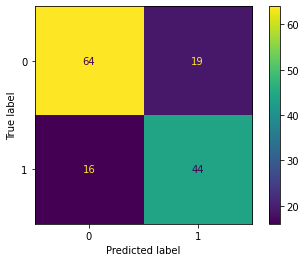

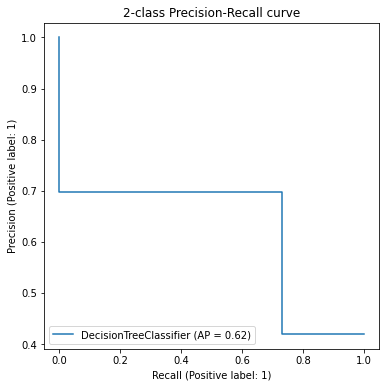

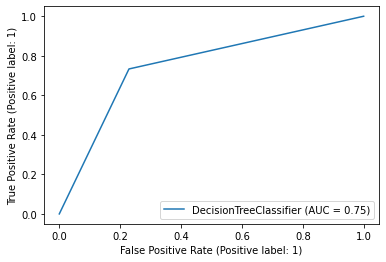

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier()
tree_reg.fit(train_x,train_y)
eval(tree_reg)

Model score: 0.7413
The cross val score with 3 folds:  [0.79473684 0.84210526 0.7989418 ]
F1-score: 0.6992


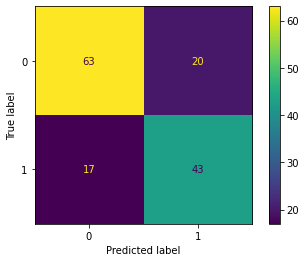

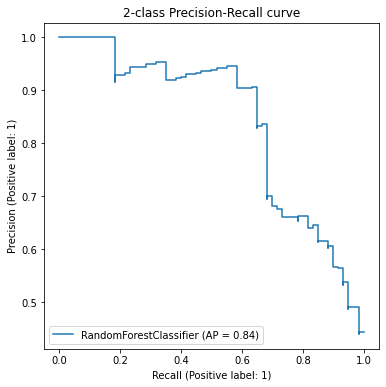

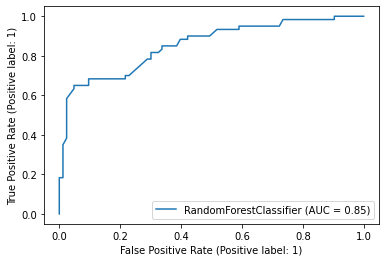

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(train_x,train_y)
eval(forest_clf)

### K Nearest Neighbors
K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

Model score: 0.7692
The cross val score with 3 folds:  [0.75789474 0.79473684 0.75661376]
F1-score: 0.7360


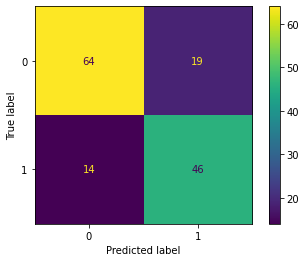

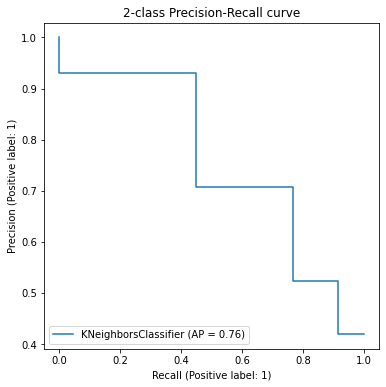

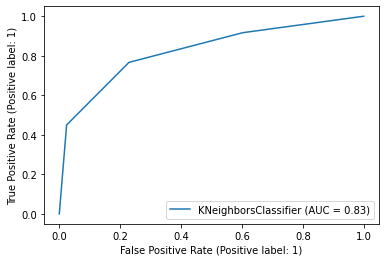

In [18]:
from sklearn.neighbors import KNeighborsClassifier

k=3

neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(train_x,train_y)
eval(neigh)

This model is highly dependent on the value of k. This means that it is key to optimise this value. One way to do this is to loop over different values of k and plot the accuracy of the model against K, this will give you the best value for k.

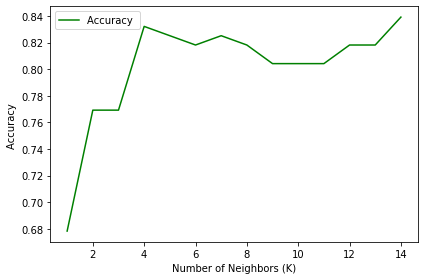

In [19]:
Ks = 15
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    yhat=neigh.predict(test_x)
    mean_acc[n-1] = neigh.score(test_x,test_y)

plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

This shows a high increase in the accuracy of the model when using k=7 instead of 3.

Model score: 0.8252
The cross val score with 3 folds:  [0.74736842 0.8        0.75132275]
F1-score: 0.7899


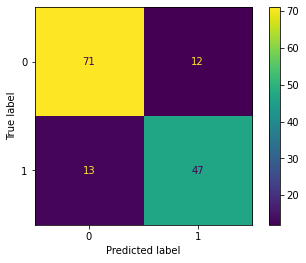

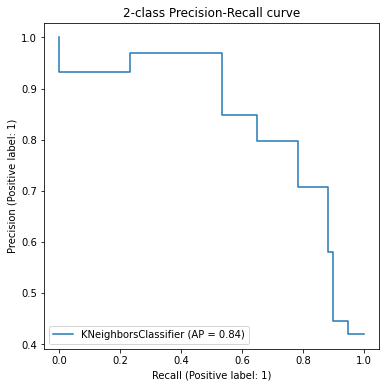

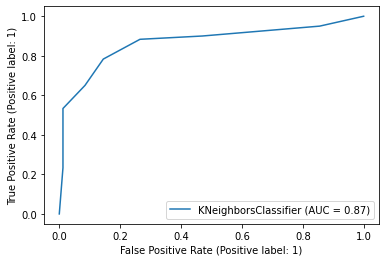

In [20]:
new_k=7
neigh2 = KNeighborsClassifier(n_neighbors = new_k)
neigh2.fit(train_x,train_y)
eval(neigh2)

### SVC
This simply try's to divide the training data but keeps are far as possible away from any points in the training set. It can be thought of as fitting a street, with the edges of the street being the as a training instance.

Model score: 0.7972
The cross val score with 3 folds:  [0.78421053 0.82631579 0.76190476]
F1-score: 0.7434


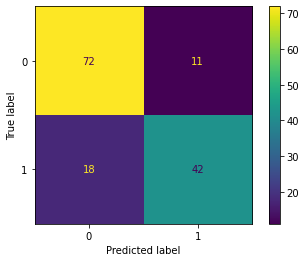

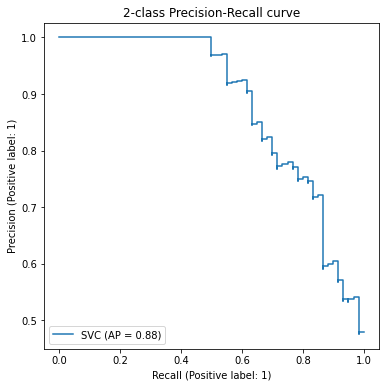

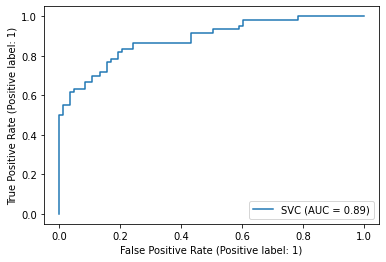

In [21]:
from sklearn.svm import SVC

svc_lin=SVC(kernel="linear", C=0.025)
svc_lin.fit(train_x,train_y)
eval(svc_lin)

Model score: 0.8112
The cross val score with 3 folds:  [0.72105263 0.8        0.72486772]
F1-score: 0.7907


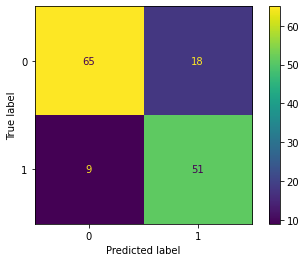

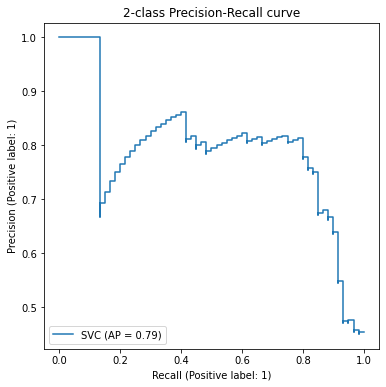

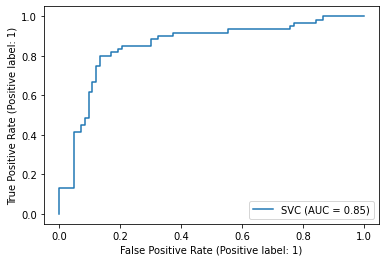

In [22]:
from sklearn.svm import SVC

svc_gamma=SVC(gamma=2, C=1)
svc_gamma.fit(train_x,train_y)
eval(svc_gamma)

### AdaBoost
Using adaboost is when the next training instance pays more attention to previous training instances where it underfitted. This will keep going focussing on the harder to fit cases. For example when the first algorithm trains it will have some misclassified training instances, on the next instance it will increase the weight of the misclassified instances and then trains again. This will produces the final model.

Model score: 0.7902
The cross val score with 3 folds:  [0.77368421 0.84736842 0.75661376]
F1-score: 0.7727


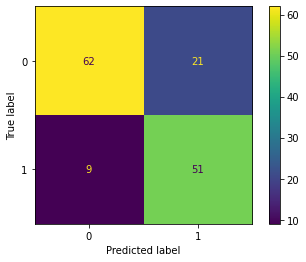

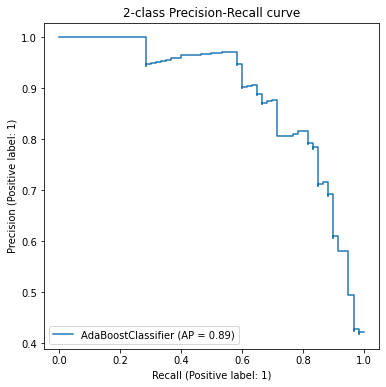

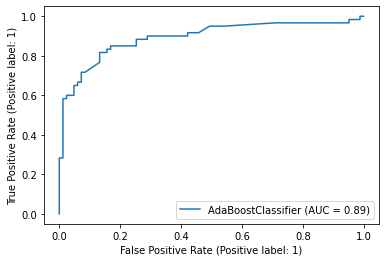

In [23]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(train_x,train_y)
eval(clf)

### Naive Bayes
This is done by applying Bayes theorem with the assumption that each pair of features are independent. There are a number of different bayes classifiers but they mainly differ by the distribution. These classifiers tend to be fast compared to more complex methods but still provide excellent results.

Model score: 0.7622
The cross val score with 3 folds:  [0.78421053 0.86842105 0.74074074]
F1-score: 0.7344


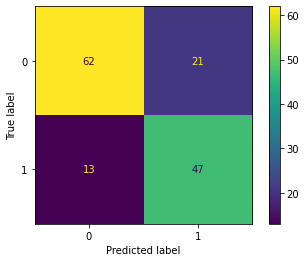

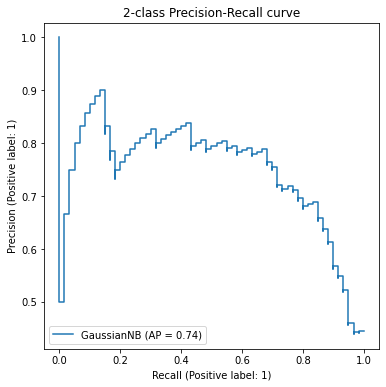

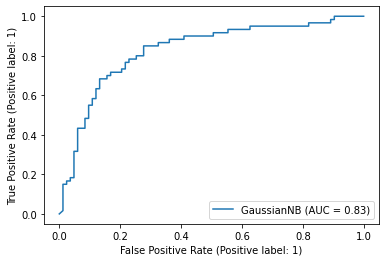

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x,train_y)
eval(gnb)

### Logistic Regression
This estimates the probability of the class belonging to one of the options, this will be between 0 and 1. If it is lower than 0.5 it will be assigned as 0.

Model score: 0.8322
The cross val score with 3 folds:  [0.79473684 0.80526316 0.73544974]
F1-score: 0.7857


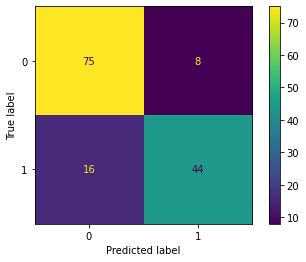

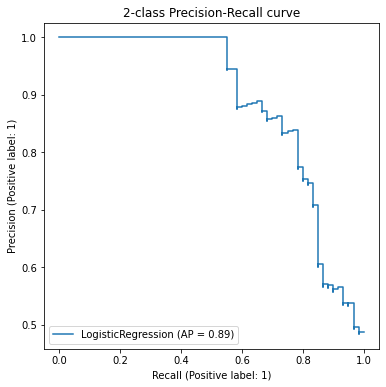

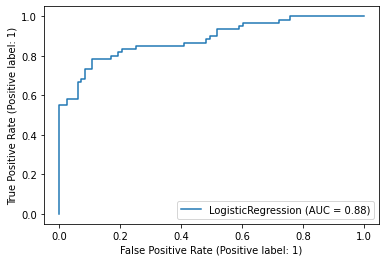

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x,train_y)
eval(log_reg)

### Trying to Improve model

Model score: 0.8252
The cross val score with 3 folds:  [0.79473684 0.85789474 0.77777778]
F1-score: 0.7934


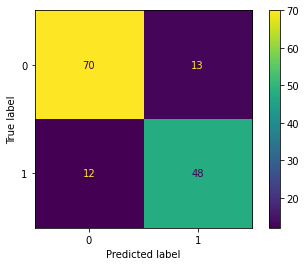

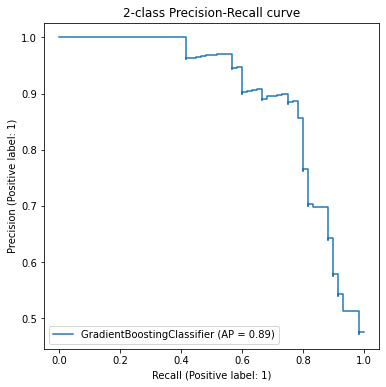

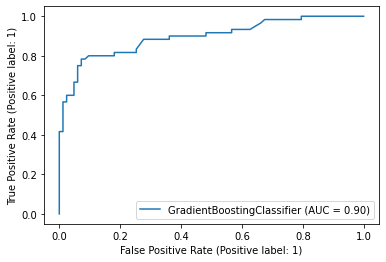

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
grad_boost.fit(train_x, train_y)
eval(grad_boost)

Model score: 0.8531
The cross val score with 3 folds:  [0.81052632 0.84210526 0.76719577]
F1-score: 0.8235


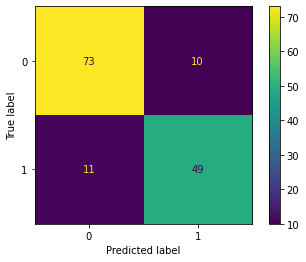

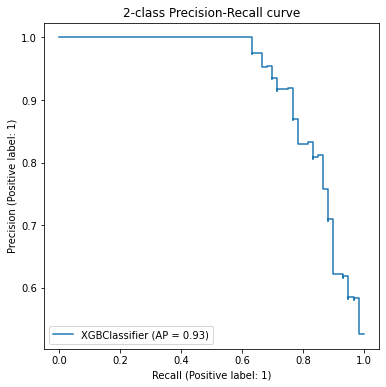

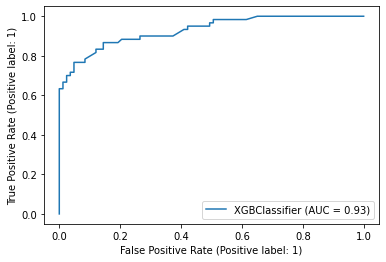

In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(train_x, train_y)
eval(xgb)

In [28]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier( estimators=[('Grad', grad_boost), ('rf', log_reg), ('gnb', forest_clf),('Knn',neigh2),('svm',svc_lin)],voting='hard')
eclf.fit(train_x, train_y)
eval(eclf,False)

Model score: 0.8322
The cross val score with 3 folds:  [0.81578947 0.85263158 0.77777778]
F1-score: 0.7931


# Summary

In [29]:
for clf, label in zip([tree_reg, forest_clf, neigh2, svc_lin, svc_gamma,clf,gnb,log_reg,grad_boost], ['Decision Tree', 'Random Forest', 'k-Nearest Neighbors','SVM lin','SVM gamma','Adaboost', 'naive Bayes', 'Logistic Regression','Grad Boost']):
    scores = cross_val_score(clf, train_x, train_y, scoring='accuracy', cv=5)
    print("Accuracy: %0.5f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.72400 (+/- 0.03684) [Decision Tree]
Accuracy: 0.80840 (+/- 0.03277) [Random Forest]
Accuracy: 0.78034 (+/- 0.02192) [k-Nearest Neighbors]
Accuracy: 0.78201 (+/- 0.03163) [SVM lin]
Accuracy: 0.74690 (+/- 0.04359) [SVM gamma]
Accuracy: 0.79792 (+/- 0.04025) [Adaboost]
Accuracy: 0.78381 (+/- 0.04295) [naive Bayes]
Accuracy: 0.78733 (+/- 0.03216) [Logistic Regression]
Accuracy: 0.80141 (+/- 0.03114) [Grad Boost]


As expected the best classifier is the voting classifier combining different models.

## Extra
I read about a automatic machine learning package called auto sklearn so I decided to try this out. This package allows for a full optimization of a full 
pipeline from data transformation to ensembled learning. This should provide a very good result. Should be noted that it working with sklearn 0.24 while the rest of this was written in v1. It also doesnt work in windows machines. https://towardsdatascience.com/auto-sklearn-an-automl-tool-based-on-bayesian-optimization-91a8e1b26c22 talks you through it.

In [30]:
!pip install auto-sklearn

  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0


In [20]:
import autosklearn.classification

automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=3600) #The default time for the task is 3600s but this can be reduced 
automl.fit(train_x, train_y)
print("Model score: %.4f" % automl.score(test_x,test_y))  

Model score: 0.8112


This shows that my votting classifier my acutally perform very well with the data that I have. This indicates that to improve this score we will need to look at feature engineering